In [58]:
import os

# Function to activate a conda environment
def activate_conda_env(env_name):
    conda_activate = os.path.join(os.environ['CONDA_PREFIX'], 'bin', 'activate')
    command = f"source {conda_activate} {env_name}"
    os.system(command)

# Example usage
activate_conda_env('dl2-code-io')

In [59]:
import pandas as pd

# Create the data
data = {
    'Model': [
        'Qwen-2.5-3B-Instruct',
        '+ Logic-RL K&K', 
        '+ Logic-RL ReasonI/O',
        '+ Logic-RL CodeI/O'
    ],
    'GSM8K': ['74.1±1.6', '42.6±4.5', '55.7±2.6', '64.0±0.8'],
    'Winogrande': ['57.5±0.6', '47.9±1.0', '60.5±0.8', '59.1±1.2'],
    'AMC': ['17.7±3.1', '11.3±3.2', '37.1±3.8', '35.7±3.3'],
    'AIME': ['1.3±0.5', '1.2±0.7', '4.3±1.0', '5.1±0.7'],
    'AVG': ['37.7±0.7', '25.8±1.4', '39.4±0.8', '41.0±0.5']
}

df = pd.DataFrame(data)
print(df)

                  Model     GSM8K Winogrande       AMC     AIME       AVG
0  Qwen-2.5-3B-Instruct  74.1±1.6   57.5±0.6  17.7±3.1  1.3±0.5  37.7±0.7
1        + Logic-RL K&K  42.6±4.5   47.9±1.0  11.3±3.2  1.2±0.7  25.8±1.4
2  + Logic-RL ReasonI/O  55.7±2.6   60.5±0.8  37.1±3.8  4.3±1.0  39.4±0.8
3    + Logic-RL CodeI/O  64.0±0.8   59.1±1.2  35.7±3.3  5.1±0.7  41.0±0.5


In [60]:
# pip install scienceplots

In [61]:
## ReasonIO 3b run data
import wandb
import pandas as pd

# Get your specific run data
api = wandb.Api()
run = api.run("meher-changlani-university-of-amsterdam/ReasonIO/diy0fdai")

# Download the specific metrics we need
metrics = run.history(keys=[
    "response_length/mean", 
    "val/test_score/reason_io",
    "_step"
])

# Save to CSV
metrics.to_csv("reasonio_3b_run_data.csv", index=False)
print(f"Data saved to reasonio_3b_run_data.csv")
print(f"Shape: {metrics.shape}")
print(f"Columns: {list(metrics.columns)}")
print(f"Training steps: {metrics['_step'].min()} to {metrics['_step'].max()}")

Data saved to reasonio_3b_run_data.csv
Shape: (124, 3)
Columns: ['_step', 'response_length/mean', 'val/test_score/reason_io']
Training steps: 10 to 1240


In [62]:
## ReasonIO 3b run data
import wandb
import pandas as pd

# Get your specific run data
api = wandb.Api()
run = api.run("meher-changlani-university-of-amsterdam/ReasonIO/runs/1vo86wcy")

# Download the specific metrics we need
metrics = run.history(keys=[
    "response_length/mean", 
    "val/test_score/reason_io",
    "_step"
])

# Save to CSV
metrics.to_csv("reasonio_7b_run_data.csv", index=False)
print(f"Data saved to reasonio_7b_run_data.csv")
print(f"Shape: {metrics.shape}")
print(f"Columns: {list(metrics.columns)}")
print(f"Training steps: {metrics['_step'].min()} to {metrics['_step'].max()}")

Data saved to reasonio_7b_run_data.csv
Shape: (124, 3)
Columns: ['_step', 'response_length/mean', 'val/test_score/reason_io']
Training steps: 10 to 1240


In [63]:
## ReasonIO 3b run data
import wandb
import pandas as pd

# Get your specific run data
api = wandb.Api()
run = api.run("meher-changlani-university-of-amsterdam/ReasonIO/runs/ndfx7631")

# Download the specific metrics we need
metrics = run.history(keys=[
    "response_length/mean", 
    "val/test_score/kk_logic",
    "_step"
])

# Save to CSV
metrics.to_csv("kk_3b_run_data.csv", index=False)
print(f"Data saved to kk_3b_run_data.csv")
print(f"Shape: {metrics.shape}")
print(f"Columns: {list(metrics.columns)}")
print(f"Training steps: {metrics['_step'].min()} to {metrics['_step'].max()}")

Data saved to kk_3b_run_data.csv
Shape: (124, 3)
Columns: ['_step', 'response_length/mean', 'val/test_score/kk_logic']
Training steps: 10 to 1240


In [64]:
## ReasonIO 3b run data
import wandb
import pandas as pd

# Get your specific run data
api = wandb.Api()
run = api.run("meher-changlani-university-of-amsterdam/ReasonIO/runs/0gt1nu7y")

# Download the specific metrics we need
metrics = run.history(keys=[
    "response_length/mean", 
    "val/test_score/reason_io",
    "_step"
])

# Save to CSV
metrics.to_csv("reasonio_3b_ablation_run_data.csv", index=False)
print(f"Data saved to reasonio_3b_ablation_run_data.csv")
print(f"Shape: {metrics.shape}")
print(f"Columns: {list(metrics.columns)}")
print(f"Training steps: {metrics['_step'].min()} to {metrics['_step'].max()}")

Data saved to reasonio_3b_ablation_run_data.csv
Shape: (124, 3)
Columns: ['_step', 'response_length/mean', 'val/test_score/reason_io']
Training steps: 10 to 1240


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
import os

def plot_training_progress(csv_file, window_size=10, figsize=(5.8, 2.6), save_plots=True, 
                          final_scores=None, final_step=1250, validation_column=None):
    """
    Create training progress plot from CSV data
    
    Parameters:
    -----------
    csv_file : str
        Path to CSV file with training metrics
    window_size : int
        Window size for rolling average (default: 10)
    figsize : tuple
        Figure size (width, height) (default: (5.8, 2.6) for LaTeX compatibility)
    save_plots : bool
        Whether to save plots to files (default: True)
    final_scores : dict or None
        Dictionary with final evaluation scores
    final_step : int
        Training step where final evaluation was done (default: 1250)
    validation_column : str or None
        Name of validation column. If None, auto-detects from available columns
    """
    
    # Use science style with vibrant colors and no LaTeX
    plt.style.use(['science', 'vibrant', 'no-latex'])
    
    # Override font sizes - smaller for LaTeX compatibility
    plt.rcParams.update({
        'font.size': 9,           # Base font size (was 11)
        'axes.labelsize': 10,     # Axis labels (was 12)
        'axes.titlesize': 11,     # Title (was 14)
        'xtick.labelsize': 8,     # X-axis tick labels (was 10)
        'ytick.labelsize': 8,     # Y-axis tick labels (was 10)
        'legend.fontsize': 8,     # Legend (was 10)
    })
    
    # Load data from CSV
    metrics = pd.read_csv(csv_file)
    
    # Auto-detect step column
    step_column = None
    for col in ['_step', 'step', 'global_step', 'iteration']:
        if col in metrics.columns:
            step_column = col
            break
    
    if step_column is None:
        raise ValueError(f"No step column found. Available columns: {list(metrics.columns)}")
    
    # Auto-detect validation column if not provided
    if validation_column is None:
        possible_val_columns = [
            'val/test_score/reason_io',
            'val/test_score/kk_logic',  # Added this one
            'val/test_score/kk',
            'validation_accuracy',
            'val_accuracy',
            'accuracy'
        ]
        
        for col in possible_val_columns:
            if col in metrics.columns:
                validation_column = col
                break
        
        if validation_column is None:
            # Show available columns that might be validation metrics
            val_cols = [col for col in metrics.columns if 'val' in col.lower() or 'accuracy' in col.lower() or 'score' in col.lower()]
            raise ValueError(f"No validation column found. Available validation-like columns: {val_cols}")
    
    print(f"Using step column: {step_column}")
    print(f"Using validation column: {validation_column}")
    
    # Remove any rows where validation data might be missing
    metrics_clean = metrics.dropna(subset=[validation_column])
    
    # Calculate rolling averages
    metrics['response_smooth'] = metrics['response_length/mean'].rolling(
        window=window_size, center=True, min_periods=1).mean()
    metrics_clean['validation_smooth'] = metrics_clean[validation_column].rolling(
        window=window_size, center=True, min_periods=1).mean()
    
    # Create the plot
    fig, ax1 = plt.subplots(figsize=figsize)
    
    # Colors
    color1 = 'C4'  # Blue
    color2 = 'C1'  # Red/orange
    
    # Response length axis
    ax1.set_xlabel('Training Step')
    ax1.set_ylabel('Mean Response Length', color=color1)
    
    # Add grid lines
    ax1.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    
    # Background (original data)
    ax1.plot(metrics[step_column], metrics['response_length/mean'], 
             color=color1, alpha=0.25, linewidth=1, zorder=1)
    
    # Foreground (smoothed data)
    line1 = ax1.plot(metrics[step_column], metrics['response_smooth'], 
                     color=color1, linewidth=1.8, label='Response Length', zorder=3)
    ax1.tick_params(axis='y', labelcolor='black')
    
    # Validation accuracy axis
    ax2 = ax1.twinx()
    ax2.set_ylabel('Validation Accuracy', color=color2)
    
    # Background (original data)
    ax2.plot(metrics_clean[step_column], metrics_clean[validation_column], 
             color=color2, alpha=0.25, linewidth=1, zorder=2)
    
    # Foreground (smoothed data)
    line2 = ax2.plot(metrics_clean[step_column], metrics_clean['validation_smooth'], 
                     color=color2, linewidth=1.8, label='Validation Accuracy', zorder=4)
    ax2.tick_params(axis='y', labelcolor='black')
    
    # Add final evaluation scores if provided
    if final_scores is not None:
        # Add a vertical line at the final evaluation step
        ax1.axvline(x=final_step, color='gray', linestyle='--', alpha=0.7, zorder=1)
        
        # Create annotation text
        score_text = "Final Evaluation:\n"
        for metric, score in final_scores.items():
            score_text += f"{metric}: {score}\n"
        score_text = score_text.rstrip('\n')  # Remove trailing newline
        
        # Add text box with final scores - smaller font
        ax1.text(0.98, 0.02, score_text, transform=ax1.transAxes, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgray', alpha=0.8),
                verticalalignment='bottom', horizontalalignment='right',
                fontsize=7, zorder=5)  # Reduced from 9 to 7
        
        # Add a star marker at the final step
        ax1.plot(final_step, ax1.get_ylim()[1]*0.95, marker='*', 
                color='gold', markersize=10, markeredgecolor='black',  # Reduced from 12 to 10
                markeredgewidth=0.5, zorder=6)
    
    # Legend with better positioning for A4
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, 
              loc='upper left', framealpha=0.9, 
              fancybox=True, shadow=False)
    
    # Adjust spacing for A4 - tighter margins
    plt.subplots_adjust(left=0.12, bottom=0.16, right=0.88, top=0.95)  # Slightly increased bottom margin
    
    # Save plots if requested
    if save_plots:
        # Extract base name from CSV file (without extension)
        base_name = os.path.splitext(csv_file)[0]
        pdf_name = f'{base_name}_plot.pdf'
        png_name = f'{base_name}_plot.png'
        
        plt.savefig(pdf_name, bbox_inches='tight', dpi=300)
        plt.savefig(png_name, dpi=300, bbox_inches='tight')
        print(f"Plots saved as '{pdf_name}' and '{png_name}'")
    
    plt.show()
    
    # Print some stats
    print(f"Data loaded from {csv_file}")
    print(f"Window size: {window_size}")
    print(f"Figure size: {figsize[0]:.1f}\" × {figsize[1]:.1f}\" (optimized for LaTeX)")
    if final_scores:
        print(f"Final evaluation at step {final_step}: {final_scores}")
    print(f"Response length range: {metrics['response_length/mean'].min():.1f} - {metrics['response_length/mean'].max():.1f}")
    print(f"Validation accuracy range: {metrics_clean[validation_column].min():.3f} - {metrics_clean[validation_column].max():.3f}")
    
    return fig, (ax1, ax2)

Using step column: _step
Using validation column: val/test_score/reason_io
Plots saved as 'reasonio_3b_run_data_plot.pdf' and 'reasonio_3b_run_data_plot.png'


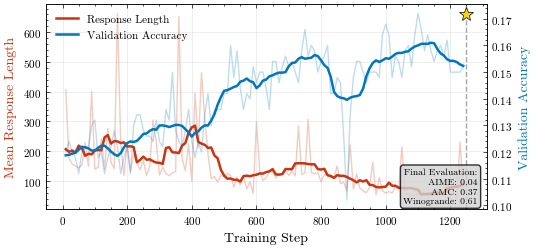

Data loaded from reasonio_3b_run_data.csv
Window size: 10
Figure size: 5.8" × 2.6" (optimized for LaTeX)
Final evaluation at step 1250: {'AIME': '0.04', 'AMC': '0.37', 'Winogrande': '0.61'}
Response length range: 35.0 - 663.5
Validation accuracy range: 0.102 - 0.172


(<Figure size 580x260 with 2 Axes>,
 (<Axes: xlabel='Training Step', ylabel='Mean Response Length'>,
  <Axes: ylabel='Validation Accuracy'>))

In [68]:
final_evaluation_scores = {
    'AIME': '0.04',
    'AMC': '0.37', 
    'Winogrande': '0.61'
}

plot_training_progress("reasonio_3b_run_data.csv", 
                      final_scores=final_evaluation_scores,
                      final_step=1250)

Using step column: _step
Using validation column: val/test_score/kk_logic
Plots saved as 'kk_3b_run_data_plot.pdf' and 'kk_3b_run_data_plot.png'


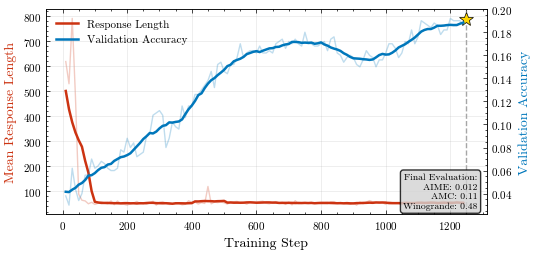

Data loaded from kk_3b_run_data.csv
Window size: 10
Figure size: 5.8" × 2.6" (optimized for LaTeX)
Final evaluation at step 1250: {'AIME': '0.012', 'AMC': '0.11', 'Winogrande': '0.48'}
Response length range: 45.4 - 789.3
Validation accuracy range: 0.030 - 0.192


(<Figure size 580x260 with 2 Axes>,
 (<Axes: xlabel='Training Step', ylabel='Mean Response Length'>,
  <Axes: ylabel='Validation Accuracy'>))

In [69]:
final_evaluation_scores = {
    'AIME': '0.012',
    'AMC': '0.11', 
    'Winogrande': '0.48'
}

plot_training_progress("kk_3b_run_data.csv", 
                      final_scores=final_evaluation_scores,
                      final_step=1250)

Using step column: _step
Using validation column: val/test_score/reason_io
Plots saved as 'reasonio_3b_ablation_run_data_plot.pdf' and 'reasonio_3b_ablation_run_data_plot.png'


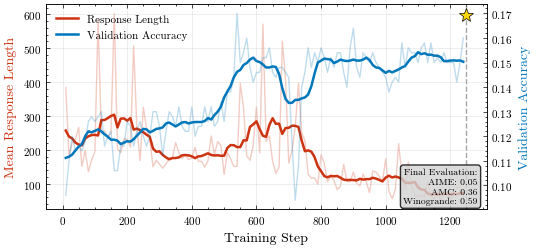

Data loaded from reasonio_3b_ablation_run_data.csv
Window size: 10
Figure size: 5.8" × 2.6" (optimized for LaTeX)
Final evaluation at step 1250: {'AIME': '0.05', 'AMC': '0.36', 'Winogrande': '0.59'}
Response length range: 51.6 - 602.9
Validation accuracy range: 0.094 - 0.170


(<Figure size 580x260 with 2 Axes>,
 (<Axes: xlabel='Training Step', ylabel='Mean Response Length'>,
  <Axes: ylabel='Validation Accuracy'>))

In [70]:
final_evaluation_scores = {
    'AIME': '0.05',
    'AMC': '0.36', 
    'Winogrande': '0.59'
}

plot_training_progress("reasonio_3b_ablation_run_data.csv", 
                      final_scores=final_evaluation_scores,
                      final_step=1250)

Using step column: _step
Using validation column: val/test_score/reason_io
Plots saved as 'reasonio_7b_run_data_plot.pdf' and 'reasonio_7b_run_data_plot.png'


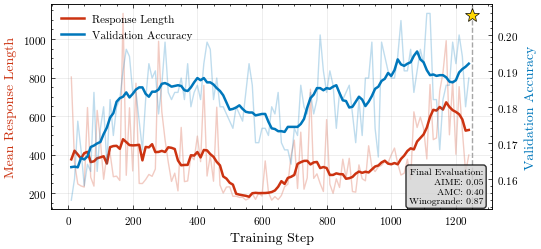

Data loaded from reasonio_7b_run_data.csv
Window size: 10
Figure size: 5.8" × 2.6" (optimized for LaTeX)
Final evaluation at step 1250: {'AIME': '0.05', 'AMC': '0.40', 'Winogrande': '0.87'}
Response length range: 163.0 - 1133.0
Validation accuracy range: 0.154 - 0.206


(<Figure size 580x260 with 2 Axes>,
 (<Axes: xlabel='Training Step', ylabel='Mean Response Length'>,
  <Axes: ylabel='Validation Accuracy'>))

In [72]:
final_evaluation_scores = {
    'AIME': '0.05',
    'AMC': '0.40', 
    'Winogrande': '0.87'
}

plot_training_progress("reasonio_7b_run_data.csv", 
                      final_scores=final_evaluation_scores,
                      final_step=1250)